## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap TCP full scan (polite)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/USER/notebooks/pcaps/nmap_tcp_full_scan_polite'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [3]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    399.987514
Name: time, dtype: float64

In [4]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [5]:
scan_times
#duration_list

0    399.987514
1    399.971916
2    399.966626
3    399.973505
4    399.981491
5    399.953735
6    399.975929
7    399.969747
8    399.957865
9    399.952214
Name: Scan times, dtype: float64

In [6]:
temp = pd.DataFrame(duration_list)

In [7]:
temp.mean()

0    399.969054
dtype: float64

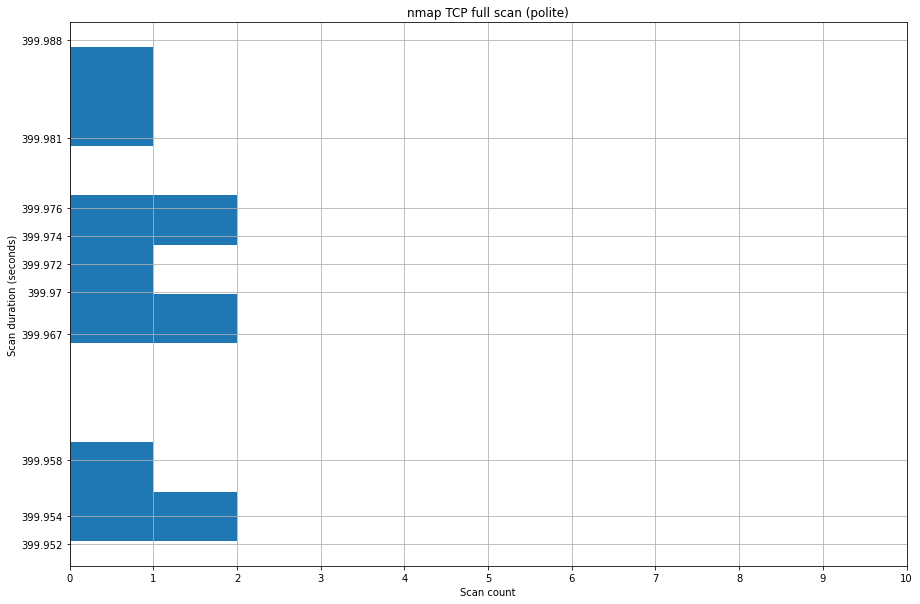

In [8]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [9]:
temp.describe()

0
count   10.000000
mean   399.969054
std      0.011645
min    399.952214
25%    399.960055
50%    399.970832
75%    399.975323
max    399.987514

## Packet count

In [10]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [11]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [12]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 50.003868521522655



## Order of ports scanned


In [13]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 60406 25
2 48694 22
3 55800 23
4 54956 53
5 51802 3306
6 35032 21
7 37736 443
8 57106 587
9 41372 1720
10 50322 256
11 54880 80
12 55930 113
13 58782 110
14 58662 993
15 56428 8888
16 54634 5900
17 59222 8080
18 35368 445
19 33478 199
20 56258 3389
21 33942 139
22 55238 111
23 60576 1025
24 47218 143
25 36736 554
26 33750 1723
27 51212 135
28 51550 995
29 37292 7937
30 53980 1165
31 40764 1001
32 34252 1044
33 53748 4242
34 41536 6667
35 35054 912
36 57154 9485
37 57704 631
38 58190 1086
39 54336 705
40 44564 3878
41 53520 2045
42 51468 19101
43 41292 259
44 57432 18101
45 44456 5030
46 44808 32768
47 38332 1169
48 48848 18040
49 51954 9502
50 43830 3527
51 47272 5802
52 53490 106
53 34332 6112
54 38472 32772
55 41182 3828
56 34032 2004
57 45770 50636
58 43308 541
59 41178 1031
60 57108 4343
61 50606 5087
62 56726 5000
63 47196 481
64 39984 2038
65 33622 458
66 50690 7000
67 59528 2382
68 39810 1026
69 49730 1
70 55588 1300
71 53896 21571
72 58876 8082
73 59748 2557
74 54898 7800
75 

625 38564 1163
626 36708 81
627 38342 616
628 56012 10004
629 55484 3580
630 44776 8193
631 48550 7103
632 48098 1718
633 34036 6646
634 58456 1132
635 46692 8085
636 38202 5432
637 44302 27353
638 34836 1110
639 45072 26214
640 44740 1998
641 58766 4003
642 32962 1023
643 34198 65389
644 60736 8000
645 57734 32778
646 51444 3000
647 59754 1309
648 49116 100
649 45718 3809
650 49402 1059
651 47618 5009
652 44368 880
653 44620 30000
654 43290 1322
655 60720 19780
656 39138 366
657 54468 6689
658 34586 1112
659 55698 1043
660 35642 8009
661 48646 1556
662 50738 5298
663 43890 57294
664 50090 2394
665 58564 20828
666 43102 6000
667 60114 2602
668 57732 1087
669 47052 40193
670 47924 3871
671 34376 515
672 43138 44501
673 44350 9102
674 58806 63331
675 53978 7004
676 38374 1085
677 50248 49165
678 57032 83
679 60474 6547
680 47480 2222
681 36378 15742
682 37824 3351
683 53476 4005
684 32868 3737
685 56858 5405
686 51528 545
687 46158 2034
688 49352 2010
689 45976 15003
690 54066 1097
691 4

292 60366 911
293 55474 2033
294 51074 6005
295 47206 8031
296 57478 2048
297 50022 1022
298 33772 61532
299 34366 1433
300 36036 10628
301 57338 9010
302 36474 16993
303 52880 340
304 41946 5952
305 36932 3005
306 50638 6881
307 35286 9575
308 54918 2009
309 55030 4111
310 57936 3827
311 33970 3814
312 53470 55055
313 37620 1122
314 39780 64623
315 38294 999
316 47714 9503
317 39636 8008
318 58676 1259
319 43052 50389
320 49276 13783
321 52312 5811
322 45590 1148
323 33034 6059
324 58170 1069
325 50694 34571
326 46990 1071
327 58402 3390
328 46678 32785
329 37554 5850
330 39910 1217
331 47354 212
332 52752 5859
333 55174 5061
334 53368 1058
335 36340 1044
336 52622 6839
337 51482 42510
338 49920 10024
339 36990 3261
340 42690 1086
341 60222 3905
342 51376 2725
343 44156 19315
344 52746 5221
345 58826 3052
346 60420 6580
347 46358 3995
348 44888 49157
349 46296 5440
350 54418 8100
351 34604 9002
352 39404 1075
353 47010 18988
354 39668 19283
355 57924 43
356 60972 3006
357 52138 5959
3

958 46920 1035
959 45348 5087
960 60714 1049
961 46578 636
962 45130 1033
963 40880 6007
964 34096 1045
965 37134 7911
966 60980 765
967 43634 2492
968 33164 425
969 52068 1533
970 39518 389
971 56822 1081
972 54900 2301
973 41526 2041
974 36360 1455
975 46768 7002
976 46530 49999
977 37680 2107
978 42628 9485
979 38000 60020
980 46896 524
981 34156 1002
982 50136 5902
983 48668 19350
984 40670 1183
985 38978 7001
986 60398 27000
987 57264 7512
988 57630 2040
989 34812 903
990 59530 7443
991 34050 8010
992 44772 15004
993 56380 1192
994 37022 1111
995 47536 8093
996 35350 646
997 33484 2800
998 44188 2007
999 37362 1030
1000 43952 14238
1 35654 22
2 55800 111
3 57146 993
4 58490 113
5 53740 8080
6 40630 3389
7 45104 21
8 42832 1720
9 38128 3306
10 49040 256
11 46366 8888
12 58528 587
13 53444 80
14 48464 5900
15 56740 110
16 52962 445
17 38678 554
18 51316 53
19 48154 25
20 53754 995
21 45436 1025
22 43076 1723
23 56188 443
24 55366 139
25 52082 23
26 33794 199
27 35934 135
28 60030 14

625 33172 1107
626 37098 500
627 53506 9090
628 53278 683
629 45788 10082
630 45640 3918
631 50028 7019
632 43918 990
633 47258 5414
634 47708 8291
635 35872 26
636 42388 13456
637 37448 7001
638 36638 32776
639 37914 1641
640 47464 8290
641 40068 1080
642 47948 9099
643 40780 255
644 54464 8652
645 39574 1666
646 46962 416
647 53478 5225
648 52448 1755
649 48788 2002
650 38788 3995
651 59250 32780
652 38074 2021
653 55152 646
654 40180 1900
655 41246 524
656 53874 49158
657 52010 5901
658 33800 1040
659 49594 9100
660 52254 32768
661 33286 1352
662 41740 1805
663 59468 2382
664 40746 5666
665 55104 481
666 38698 64623
667 48828 4002
668 60060 3920
669 41624 10617
670 46892 2010
671 57484 9101
672 52828 32777
673 33926 7512
674 48868 16016
675 40298 3493
676 57754 1069
677 36734 668
678 36380 9003
679 51858 6646
680 42104 1072
681 43382 5987
682 52026 179
683 59444 161
684 42392 6699
685 53470 749
686 41462 106
687 39258 10024
688 56344 14442
689 59680 1272
690 37662 1102
691 50134 109

189 35552 2001
190 57392 8290
191 41920 512
192 35932 987
193 57884 1049
194 37314 9593
195 48686 1147
196 32864 13782
197 44700 903
198 39032 8291
199 48712 5000
200 57044 17988
201 60196 13456
202 54832 212
203 57618 7741
204 55386 41511
205 39472 2800
206 38522 7937
207 59222 3
208 48752 1069
209 49598 1131
210 33384 2008
211 51044 4443
212 34270 2179
213 40756 6000
214 35872 648
215 38404 1443
216 39372 6779
217 52248 109
218 42168 524
219 49842 705
220 58798 458
221 43130 5087
222 41918 1061
223 51080 1201
224 35196 6101
225 58744 1234
226 57270 6788
227 56874 4343
228 46102 3871
229 51682 1048
230 47326 1063
231 46078 7778
232 57122 636
233 55818 1124
234 45174 3878
235 52762 16113
236 35336 2002
237 48860 64680
238 47232 1040
239 43060 7007
240 34106 44176
241 41220 6689
242 43394 222
243 46386 1600
244 51292 1122
245 51524 9009
246 33952 8083
247 33222 1100
248 43314 1761
249 58812 27355
250 47968 2557
251 57382 17877
252 56478 1075
253 56420 1187
254 38772 2005
255 33934 20828

791 55474 10082
792 47274 8400
793 60066 1043
794 35746 32784
795 47244 1164
796 60862 51493
797 56080 2103
798 40856 2875
799 49154 5101
800 49708 2492
801 50678 6006
802 36190 7001
803 38562 55056
804 59918 5544
805 42310 5510
806 46916 9
807 55336 12174
808 53084 8084
809 55242 3390
810 56600 1076
811 59754 24800
812 33746 19350
813 35932 5915
814 51260 1248
815 40034 515
816 56632 2046
817 55816 1998
818 54440 1947
819 53188 14000
820 44826 3351
821 37124 1782
822 51904 3737
823 51568 88
824 33770 406
825 46166 5003
826 45562 6004
827 53658 264
828 49808 4848
829 47146 1259
830 48020 5877
831 60370 27352
832 54594 2003
833 56978 3546
834 55080 14441
835 34268 18101
836 51224 8011
837 48840 14238
838 49696 1098
839 56118 1022
840 33454 2068
841 41174 4111
842 39864 32778
843 43242 8088
844 54024 3283
845 46260 2525
846 55540 749
847 42200 1296
848 60930 7103
849 41214 84
850 58024 10025
851 39530 106
852 55766 465
853 58458 49
854 44738 5001
855 49506 5963
856 41282 4445
857 53556 2

458 41228 1100
459 58816 5810
460 33030 5915
461 48582 9080
462 51366 27355
463 46078 3659
464 55444 211
465 50622 1137
466 49404 1088
467 47860 10024
468 43994 15004
469 42704 10243
470 34352 2021
471 38794 1935
472 33358 4
473 47342 18988
474 58034 8400
475 50456 8082
476 46322 6543
477 41530 1801
478 44756 306
479 38672 8007
480 42648 32778
481 35276 12000
482 43420 2001
483 52336 62078
484 42136 481
485 42568 2601
486 51362 3260
487 60622 9103
488 58016 31038
489 54958 1089
490 35118 1070
491 59666 1218
492 36482 6510
493 41238 2068
494 54282 1049
495 42304 1148
496 40706 9535
497 49034 9943
498 43538 1072
499 49242 9418
500 55170 2160
501 41130 1091
502 44932 8222
503 38042 16001
504 42832 3268
505 34550 146
506 42180 465
507 40024 3325
508 33932 33
509 60026 6000
510 35520 1048
511 33346 2605
512 39660 6969
513 43820 1061
514 35160 6004
515 58904 902
516 56408 49160
517 51982 406
518 48960 6100
519 59908 9207
520 39086 1024
521 41784 44176
522 53928 4443
523 42134 8086
524 52576 

124 48610 16993
125 51642 52848
126 56344 5877
127 39090 5998
128 53750 3013
129 55698 3580
130 44772 1149
131 40390 1864
132 58794 14000
133 49246 1183
134 42630 2022
135 37644 1032
136 48890 61900
137 54332 1580
138 54802 9998
139 56740 1067
140 57026 5000
141 48798 7103
142 33892 458
143 45896 3809
144 33628 1201
145 53414 1433
146 46518 1461
147 60290 10778
148 55432 10215
149 43464 1322
150 41058 1001
151 44778 4567
152 37552 1151
153 52830 49153
154 49598 2010
155 35646 1089
156 34568 2725
157 53828 2045
158 51912 5904
159 45942 5989
160 50926 5298
161 59016 63331
162 45342 5922
163 34250 2004
164 36168 1761
165 52270 3011
166 39768 1007
167 33348 2047
168 60276 1037
169 34006 8021
170 50104 8994
171 40796 2200
172 36816 9081
173 59512 5730
174 52762 16113
175 53578 50006
176 47608 37
177 40426 1126
178 43542 541
179 33812 64623
180 44218 6779
181 38052 7676
182 42186 1055
183 45994 593
184 53534 3851
185 43034 24444
186 46506 9944
187 54846 9418
188 36758 843
189 35406 7002
190 

791 56820 20000
792 47146 2121
793 51486 901
794 42858 1048
795 49524 5910
796 56750 9666
797 38922 32772
798 43364 44501
799 45402 8291
800 43444 5815
801 38896 62078
802 36788 6025
803 57656 8086
804 50364 2394
805 34654 8400
806 48304 8010
807 43692 301
808 36812 50300
809 59464 2196
810 36722 513
811 48192 3871
812 33558 1108
813 42608 425
814 51842 27356
815 40852 49154
816 42174 1002
817 55118 4006
818 44544 3827
819 32892 49160
820 58130 3914
821 60082 1309
822 35498 32
823 42186 5100
824 59512 1141
825 47328 1074
826 48486 52822
827 41856 6667
828 53220 2809
829 43874 2013
830 34472 1248
831 41662 6566
832 49072 10009
833 35078 4446
834 32798 19780
835 38834 1163
836 47230 1122
837 34666 6112
838 43750 55555
839 59080 9090
840 36048 109
841 54406 8649
842 57798 18101
843 60364 8001
844 54106 9003
845 47926 56738
846 60754 6059
847 38388 50001
848 54528 2605
849 41424 4848
850 49290 5550
851 55222 9503
852 56622 8093
853 40584 5566
854 59772 1186
855 39872 4045
856 58660 1086
85

457 45276 8300
458 45088 2144
459 53152 9071
460 47842 2135
461 47738 32781
462 33018 19315
463 37904 667
464 51966 8088
465 45324 2103
466 45380 1060
467 35230 5815
468 52468 1583
469 42224 2222
470 45442 13722
471 34424 55056
472 58170 5959
473 57910 40193
474 59636 2043
475 38484 7627
476 58692 2701
477 59356 2366
478 56568 8333
479 55118 1198
480 56926 9900
481 56348 3325
482 55548 5298
483 58822 56738
484 36072 3476
485 44492 1201
486 53276 49159
487 36898 3880
488 50884 22939
489 46192 90
490 57180 4900
491 50344 1801
492 36778 458
493 58088 1050
494 60772 9111
495 37410 24444
496 46074 8011
497 44946 1119
498 50346 4
499 41680 10215
500 52166 8291
501 54044 5678
502 49246 1131
503 34162 990
504 46094 2010
505 34936 3871
506 43952 3580
507 57964 4045
508 49572 1122
509 49006 8192
510 41404 27000
511 53830 5060
512 51394 1503
513 37978 2004
514 59308 2190
515 33322 500
516 57164 3322
517 37122 9618
518 47360 987
519 43004 3703
520 50932 1658
521 54398 49999
522 52968 1287
523 4646

124 48554 19801
125 48864 514
126 35774 1782
127 33566 3814
128 55704 3017
129 47960 3551
130 36606 55600
131 44568 691
132 40884 10629
133 46524 18988
134 40476 512
135 54812 7435
136 53994 10616
137 59960 911
138 43756 5080
139 46164 49999
140 51956 10012
141 34242 5431
142 54876 2105
143 50714 2910
144 59204 9009
145 54244 1131
146 51598 3370
147 51262 4004
148 37232 5850
149 37846 2045
150 50442 1149
151 46302 10566
152 54228 667
153 57376 10215
154 35866 407
155 46704 981
156 53638 49167
157 60008 2119
158 39764 1027
159 51916 5811
160 55528 5002
161 37684 1296
162 33886 6547
163 60480 2121
164 35906 900
165 59418 5225
166 39384 30
167 33720 18101
168 55334 3871
169 59460 49156
170 53400 65129
171 58378 5907
172 54938 2106
173 34204 50001
174 52188 711
175 44804 8402
176 46728 5432
177 43012 1236
178 35166 666
179 36914 3077
180 46968 212
181 45696 5009
182 57458 26214
183 59228 749
184 38996 7999
185 35280 3527
186 38664 1328
187 44388 2604
188 45586 1152
189 51130 15660
190 3963

790 46452 30718
791 53404 211
792 46608 1071
793 43380 6502
794 33598 31038
795 43078 1009
796 47942 722
797 44316 5810
798 46456 20828
799 45030 1272
800 53684 32778
801 60634 2135
802 37060 32773
803 58404 1300
804 42534 9878
805 54986 1110
806 51676 20
807 51036 5903
808 45772 15003
809 40250 1098
810 52588 13
811 34284 9002
812 35990 1044
813 57678 12174
814 36882 56737
815 36618 49158
816 40494 4998
817 55712 1141
818 32798 5666
819 42768 9500
820 33936 6100
821 35330 1580
822 50616 6789
823 45632 16016
824 51956 1277
825 42136 144
826 60804 3800
827 44842 3333
828 39486 23502
829 40380 7070
830 59698 179
831 33838 1524
832 56270 1081
833 34534 2179
834 44140 648
835 54982 2393
836 48936 5911
837 45344 2401
838 43168 32782
839 45882 7007
840 51604 6346
841 53104 55055
842 44600 106
843 36554 1216
844 45408 873
845 47160 5815
846 59612 8443
847 48636 4125
848 39924 8081
849 42714 2222
850 51794 5959
851 49654 7800
852 43066 5987
853 54564 2301
854 52916 14000
855 52544 7201
856 390

956 50444 4111
957 49442 5003
958 36354 8649
959 50634 8194
960 41980 50000
961 50014 4
962 42608 6839
963 48112 1085
964 52788 1112
965 57912 50500
966 46158 427
967 51738 898
968 36216 1098
969 45256 8002
970 48872 6007
971 33108 7443
972 44958 63331
973 35156 1900
974 44796 1027
975 41204 5925
976 53750 6566
977 52578 2717
978 53382 13
979 39636 990
980 50022 2068
981 56868 5200
982 50360 1600
983 58918 2605
984 54700 406
985 37472 54328
986 60484 9103
987 42044 41511
988 58252 992
989 37838 5877
990 53642 106
991 45028 7402
992 49866 9999
993 40478 1322
994 44578 7000
995 37974 1043
996 59032 5922
997 54246 2065
998 49448 987
999 40818 1072
1000 48506 1064
1 54578 1720
2 34516 199
3 40028 3306
4 54664 8080
5 56736 1025
6 50682 445
7 60258 993
8 50874 80
9 57398 8888
10 37556 23
11 50156 3389
12 35260 135
13 40048 21
14 45002 143
15 36138 5900
16 34674 554
17 38906 256
18 57886 1723
19 55378 110
20 50320 587
21 42664 111
22 46380 22
23 52154 53
24 52762 113
25 54090 995
26 58882 25


623 38280 2967
624 51662 5859
625 36746 306
626 41106 1947
627 59536 1137
628 49020 1007
629 52838 1066
630 54204 49999
631 35020 43
632 38482 6692
633 58150 2179
634 57104 3690
635 47242 2042
636 45446 1186
637 47234 3003
638 60624 3030
639 54970 4005
640 41064 1126
641 50772 4000
642 39614 254
643 46104 57294
644 57102 9040
645 36588 1688
646 47628 2875
647 53990 1864
648 56876 13783
649 50256 1076
650 52158 5405
651 47014 900
652 37414 7512
653 43766 8873
654 59944 3517
655 54358 27352
656 47486 5190
657 39570 5800
658 34984 5815
659 50190 10024
660 41600 1096
661 52558 4445
662 37104 668
663 49078 8090
664 59714 417
665 41838 49163
666 43848 44442
667 59670 2381
668 45332 2021
669 54984 1021
670 42934 631
671 41474 10629
672 48392 3814
673 60158 5810
674 46350 1112
675 57250 783
676 40072 5666
677 47422 7937
678 56776 3809
679 44252 981
680 55050 1169
681 52036 1026
682 47810 1434
683 60468 57797
684 55632 49175
685 56574 9415
686 51070 1503
687 51974 83
688 55086 32783
689 44188 9

In [14]:
orders_port

scannr  sport  dport
0          1  60406     25
1          2  48694     22
2          3  55800     23
3          4  54956     53
4          5  51802   3306
...      ...    ...    ...
9995     996  40644    902
9996     997  54424    722
9997     998  47390     42
9998     999  57716  40193
9999    1000  52078   7800

[10000 rows x 3 columns]

In [15]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [16]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [17]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

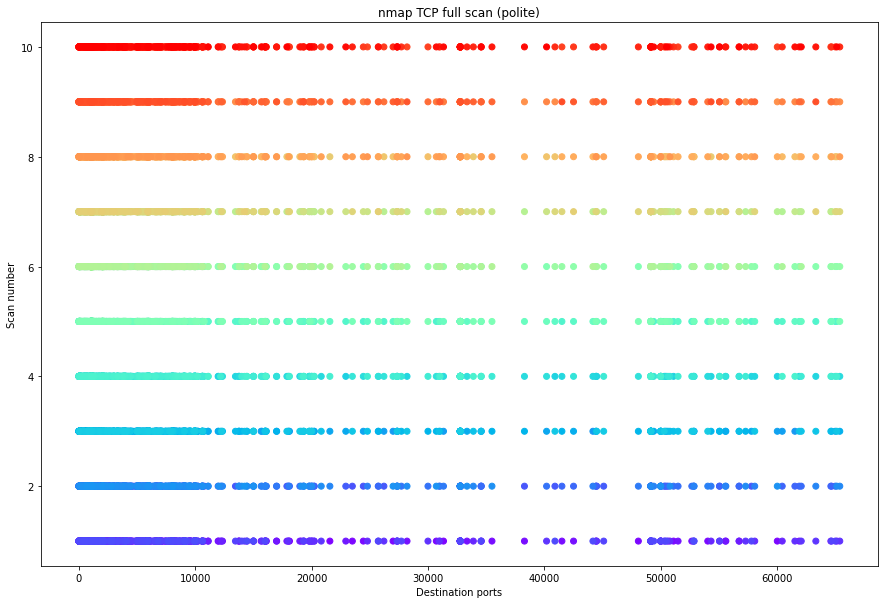

In [18]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [19]:
payloads.value_counts()

Series([], dtype: int64)

## IP-ID

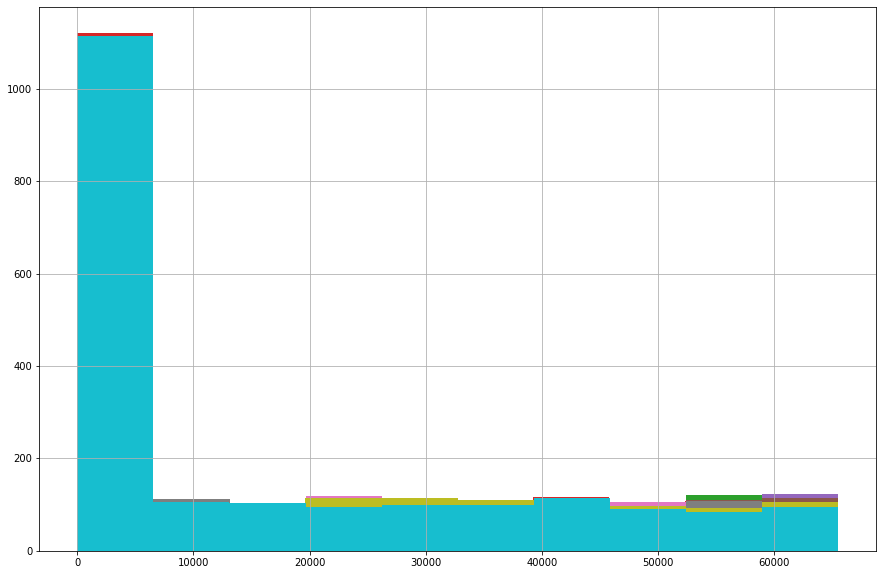

In [20]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

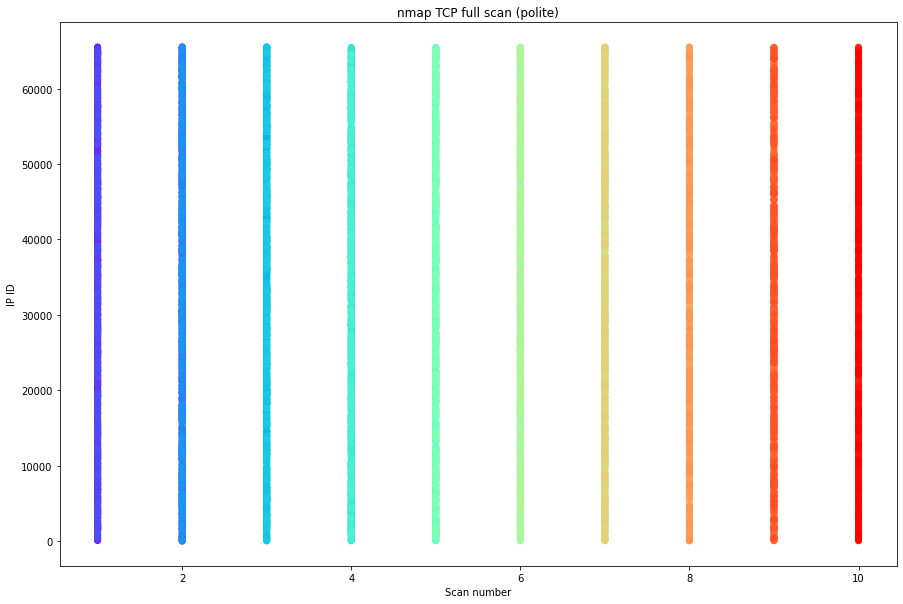

In [21]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


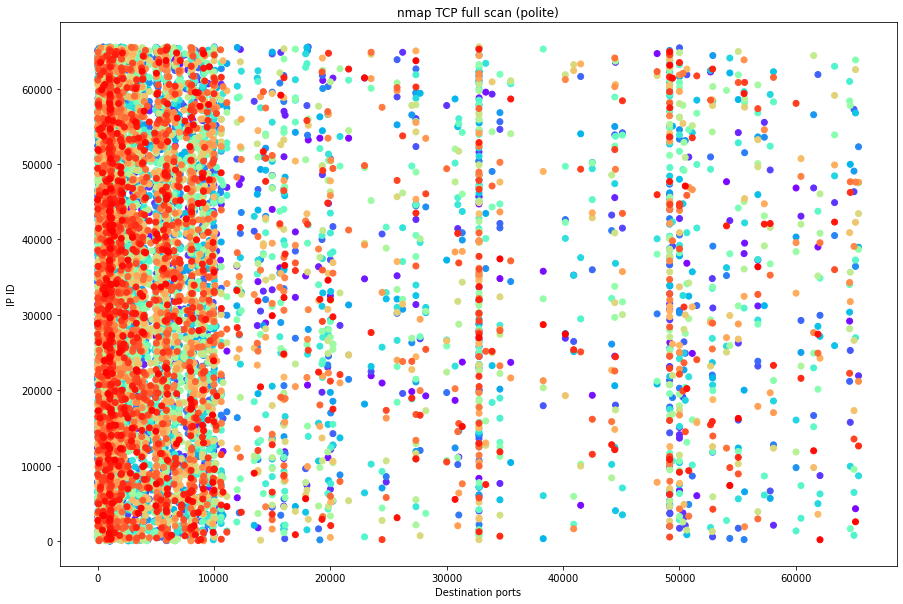

In [22]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

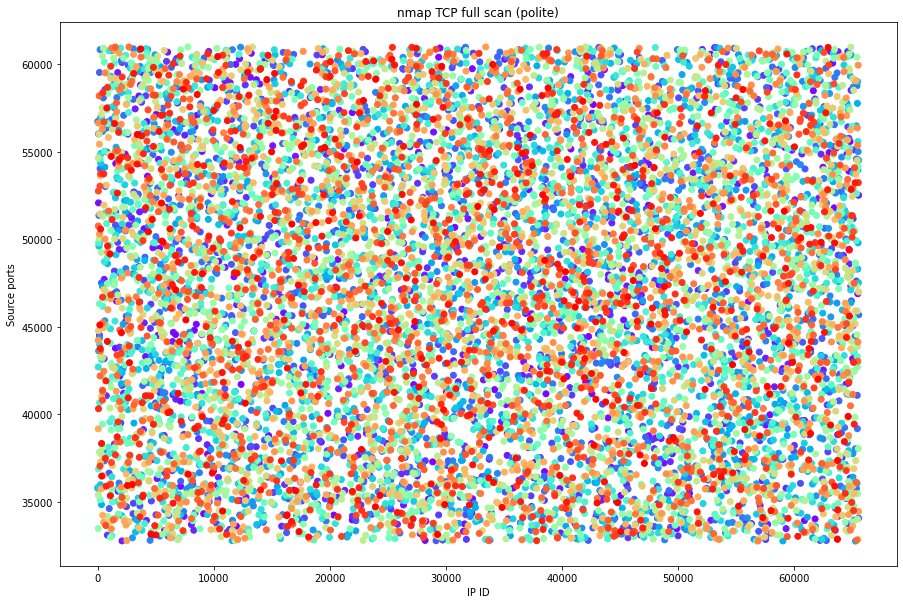

In [23]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet length: 60
Packet len

## TCP Window size

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
-----
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size: 64240
Window size:

## Sequence number


In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 2894008004
Sequence number: 1742241078
Sequence number: 1605944880
Sequence number: 4160395125
Sequence number: 3286349257
Sequence number: 1513783903
Sequence number: 314612218
Sequence number: 1594822702
Sequence number: 2761670640
Sequence number: 3541906205
Sequence number: 2231875311
Sequence number: 1393433155
Sequence number: 1050815655
Sequence number: 3525918012
Sequence number: 1425536479
Sequence number: 3312440019
Sequence number: 3128636620
Sequence number: 66328781
Sequence number: 3038178763
Sequence number: 1757998016
Sequence number: 1428521791
Sequence number: 2787171180
Sequence number: 3321641977
Sequence number: 1115091270
Sequence number: 187177593
Sequence number: 997246688
Sequence number: 3797586151
Sequence number: 3030911472
Sequence number: 89144348
Sequence number: 1583826410
Sequence number: 4222537364
Sequence number: 1034412073
Sequence number: 2376809222
Sequence number: 1331967582
Sequence number: 505672064
Sequence number: 4268168699


Sequence number: 1186807853
Sequence number: 1275742825
Sequence number: 2992883374
Sequence number: 1496425820
Sequence number: 881286909
Sequence number: 3078388286
Sequence number: 3948686436
Sequence number: 26050362
Sequence number: 1984993116
Sequence number: 1825044932
Sequence number: 857451827
Sequence number: 90910578
Sequence number: 1904599821
Sequence number: 790052178
Sequence number: 2600422564
Sequence number: 2826259920
Sequence number: 2758032657
Sequence number: 543384128
Sequence number: 680994886
Sequence number: 2452686936
Sequence number: 2390583196
Sequence number: 3664784538
Sequence number: 2986955387
Sequence number: 239477918
Sequence number: 167123618
Sequence number: 1282066328
Sequence number: 2671819591
Sequence number: 479164135
Sequence number: 3150799363
Sequence number: 663205456
Sequence number: 231478323
Sequence number: 2049283907
Sequence number: 1337587570
Sequence number: 571206750
Sequence number: 4128059623
Sequence number: 385621099
Sequence

Sequence number: 2136310722
Sequence number: 1651942243
Sequence number: 2136395012
Sequence number: 1191076862
Sequence number: 1040616277
Sequence number: 3523774264
Sequence number: 702565748
Sequence number: 3139172336
Sequence number: 1964938570
Sequence number: 1938861030
Sequence number: 2855576628
Sequence number: 3348048631
Sequence number: 1740593386
Sequence number: 1768988328
Sequence number: 1146508285
Sequence number: 3040005784
Sequence number: 3646149632
Sequence number: 3500294786
Sequence number: 845308712
Sequence number: 1630412471
Sequence number: 1728083702
Sequence number: 2255119560
Sequence number: 3841984538
Sequence number: 2153479158
Sequence number: 3678854822
Sequence number: 144618111
Sequence number: 2079128101
Sequence number: 517426501
Sequence number: 1475876363
Sequence number: 294965528
Sequence number: 4123976290
Sequence number: 3485288899
Sequence number: 3727665242
Sequence number: 3924735868
Sequence number: 3317153609
Sequence number: 32361690

Sequence number: 3460267388
Sequence number: 2888477106
Sequence number: 3995839980
Sequence number: 2432405927
Sequence number: 3104741465
Sequence number: 1094366571
Sequence number: 1518162215
Sequence number: 1390844955
Sequence number: 2120381968
Sequence number: 2757062197
Sequence number: 1320096228
Sequence number: 853822281
Sequence number: 1969811009
Sequence number: 3040829301
Sequence number: 2961123737
Sequence number: 1444343888
Sequence number: 290514903
Sequence number: 4092553881
Sequence number: 4190343643
Sequence number: 2237126592
Sequence number: 2291943470
-----
Sequence number: 1991126620
Sequence number: 1637567677
Sequence number: 4251857995
Sequence number: 3165540535
Sequence number: 2659496662
Sequence number: 352515430
Sequence number: 516928032
Sequence number: 1681891039
Sequence number: 2178571745
Sequence number: 2391557598
Sequence number: 2906139240
Sequence number: 4201861406
Sequence number: 491095055
Sequence number: 341599372
Sequence number: 138

Sequence number: 3260600873
Sequence number: 676195449
Sequence number: 3779957579
Sequence number: 4034611752
Sequence number: 931277585
Sequence number: 2637402609
Sequence number: 1252195450
Sequence number: 2488694325
Sequence number: 1434359516
Sequence number: 2367339812
Sequence number: 450419907
Sequence number: 3354144970
Sequence number: 37870737
Sequence number: 3111559682
Sequence number: 1507561309
Sequence number: 3113165907
Sequence number: 2238582015
Sequence number: 2669682484
Sequence number: 3958785853
Sequence number: 2646385323
Sequence number: 1541413158
Sequence number: 3143872357
Sequence number: 3196308652
Sequence number: 3467766149
Sequence number: 2301369359
Sequence number: 3457744176
Sequence number: 3997636401
Sequence number: 4126518350
Sequence number: 3523675411
Sequence number: 4134714484
Sequence number: 3515935915
Sequence number: 56633019
Sequence number: 3215309684
Sequence number: 619829209
Sequence number: 2881969218
Sequence number: 866335467
S

Sequence number: 3173138881
Sequence number: 426792194
Sequence number: 3343778804
Sequence number: 2774166108
Sequence number: 2831337094
Sequence number: 3067049374
Sequence number: 2128569303
Sequence number: 1298071307
Sequence number: 2569490831
Sequence number: 1545703733
Sequence number: 3482379391
Sequence number: 760610157
Sequence number: 2193747878
Sequence number: 190496688
Sequence number: 3857786911
Sequence number: 127005229
Sequence number: 910982565
Sequence number: 3265485101
Sequence number: 1821483296
Sequence number: 3769935650
Sequence number: 4067878545
Sequence number: 212873893
Sequence number: 2827640244
Sequence number: 886907979
Sequence number: 1367155547
Sequence number: 2366654630
Sequence number: 196819508
Sequence number: 3700120071
Sequence number: 1491525769
Sequence number: 1972318628
Sequence number: 3928040094
Sequence number: 534905472
Sequence number: 3566145077
Sequence number: 3969593462
Sequence number: 1764394041
Sequence number: 2928955320
S

Sequence number: 377069737
Sequence number: 1344769560
Sequence number: 3380913035
Sequence number: 543598144
Sequence number: 124324876
Sequence number: 24129076
Sequence number: 2917487685
Sequence number: 2218078057
Sequence number: 729821014
Sequence number: 2993554281
Sequence number: 1950408405
Sequence number: 2626995624
Sequence number: 2299665694
Sequence number: 1218711507
Sequence number: 3371602290
Sequence number: 692314843
Sequence number: 2994295637
Sequence number: 3487476465
Sequence number: 1369004847
Sequence number: 2619096365
Sequence number: 4035393519
Sequence number: 3014001613
Sequence number: 3193146146
Sequence number: 3506985521
Sequence number: 192494577
Sequence number: 406933067
Sequence number: 3172122387
Sequence number: 1583566817
Sequence number: 3038004944
Sequence number: 885364947
Sequence number: 3811432636
Sequence number: 797838446
Sequence number: 2072229692
Sequence number: 4103035330
Sequence number: 2705975163
Sequence number: 469066349
Sequ

Sequence number: 2530689226
Sequence number: 1934604096
Sequence number: 4163737288
Sequence number: 915504639
Sequence number: 667203970
Sequence number: 2338493149
Sequence number: 3458208483
Sequence number: 3118745758
Sequence number: 3055223024
Sequence number: 1541545391
Sequence number: 1588656206
Sequence number: 3366140929
Sequence number: 1071414094
Sequence number: 1149501785
Sequence number: 3215718988
Sequence number: 2801326261
Sequence number: 1565960373
Sequence number: 3979351155
Sequence number: 3068712407
Sequence number: 495072832
Sequence number: 4216330793
Sequence number: 97539554
Sequence number: 2348105520
Sequence number: 1109989346
Sequence number: 3684042514
Sequence number: 780994988
Sequence number: 3514778631
Sequence number: 1223776213
Sequence number: 24175176
Sequence number: 1691547688
Sequence number: 3988138876
Sequence number: 717727399
Sequence number: 2466808296
Sequence number: 2387484999
Sequence number: 1675263987
Sequence number: 1393097867
S

Sequence number: 3784905274
Sequence number: 709143761
Sequence number: 3081768413
Sequence number: 1875618682
Sequence number: 530693329
Sequence number: 2156747896
Sequence number: 3455528187
Sequence number: 2037933875
Sequence number: 345439436
Sequence number: 959123983
Sequence number: 1095674029
Sequence number: 3298205113
Sequence number: 3462709835
Sequence number: 4063864357
Sequence number: 2328868170
Sequence number: 2503217456
Sequence number: 1991548774
Sequence number: 976921027
Sequence number: 2664375264
Sequence number: 1036897138
Sequence number: 3507609794
Sequence number: 3674168249
Sequence number: 701855029
Sequence number: 1712818345
Sequence number: 3162331520
Sequence number: 2086547596
Sequence number: 4066420187
Sequence number: 339766406
Sequence number: 2014870993
Sequence number: 2577860790
Sequence number: 1914637466
Sequence number: 3041957804
Sequence number: 1135767710
Sequence number: 2483722156
Sequence number: 1284948261
Sequence number: 2891247428

Sequence number: 580641262
Sequence number: 723571201
Sequence number: 3573706024
Sequence number: 508498475
Sequence number: 3521320915
Sequence number: 903488449
Sequence number: 3039841610
Sequence number: 2153023290
Sequence number: 3257415534
Sequence number: 1794099260
Sequence number: 912793566
Sequence number: 1408578056
Sequence number: 2316738607
Sequence number: 1342170702
Sequence number: 2766361424
Sequence number: 4191212355
Sequence number: 3609108293
Sequence number: 2013810113
Sequence number: 2024219369
Sequence number: 3189234592
Sequence number: 1442082623
Sequence number: 639418758
Sequence number: 4010117778
Sequence number: 4178155342
Sequence number: 91812717
Sequence number: 2679453955
Sequence number: 3719968542
Sequence number: 827924836
Sequence number: 3774480813
Sequence number: 1581729380
Sequence number: 1912769041
Sequence number: 493209442
Sequence number: 344719806
Sequence number: 1834136001
Sequence number: 1868232517
Sequence number: 765906919
Sequ

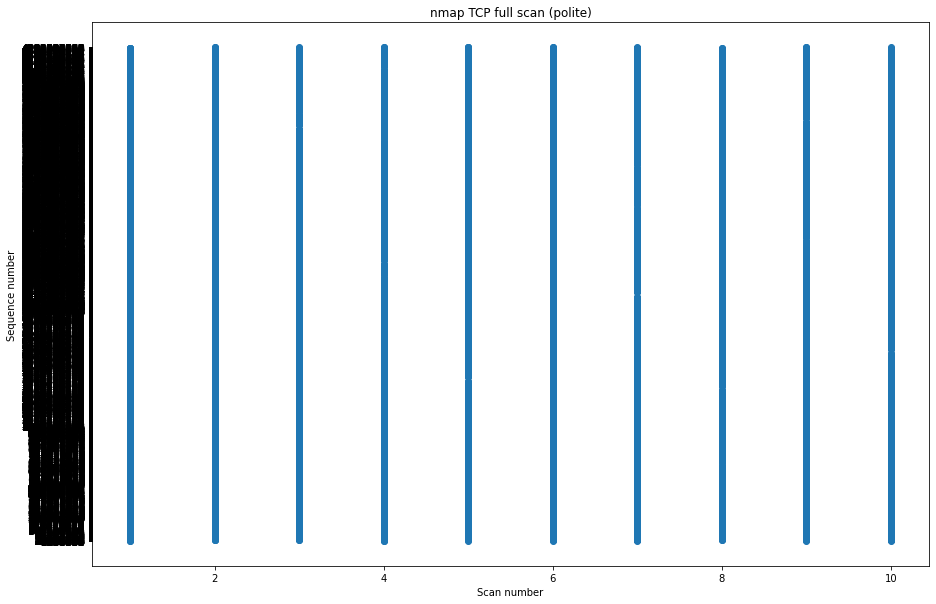

In [27]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


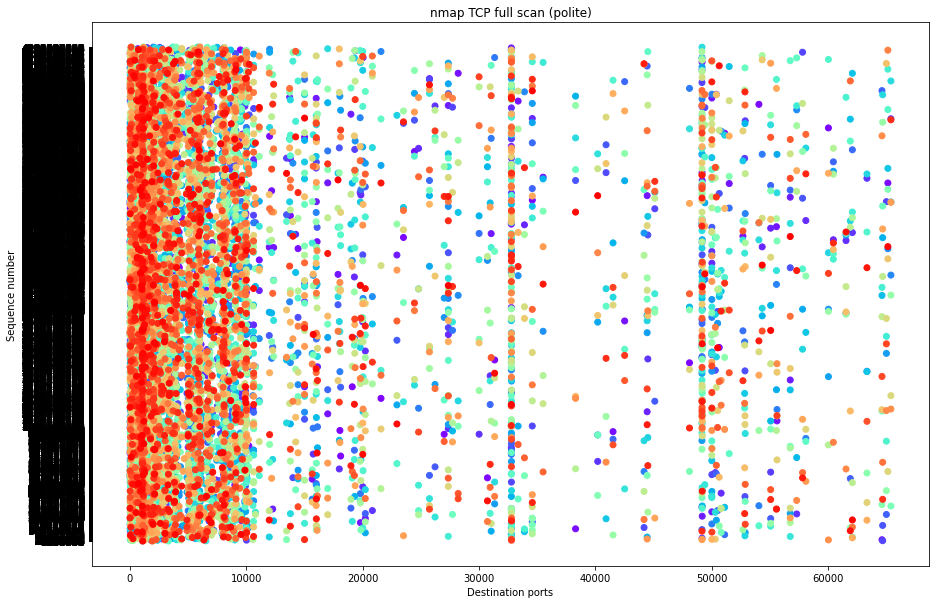

In [28]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

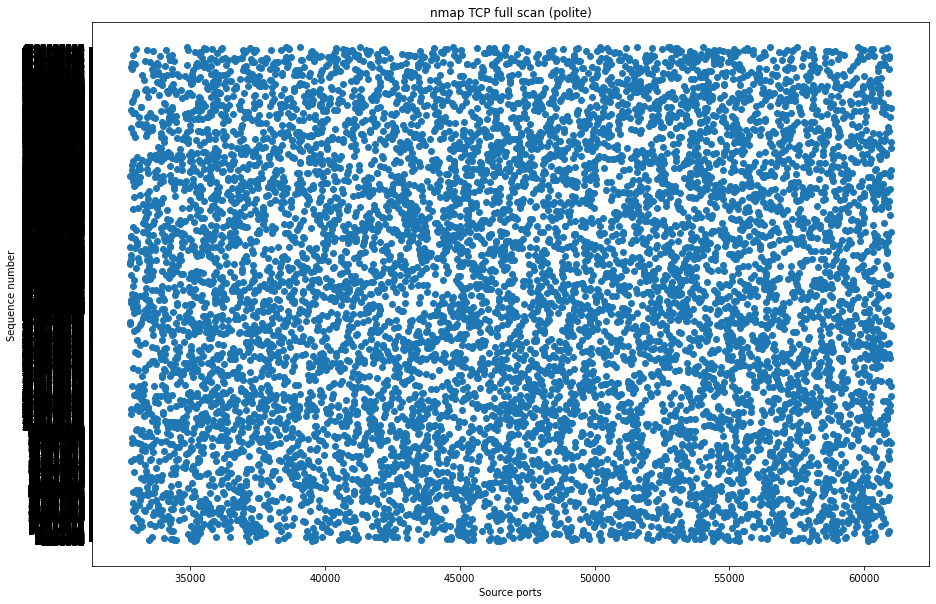

In [29]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [30]:
len(set(orders_port['sport']))

7144

## Flags

In [31]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F